# Time series: glucose study casus

author: F.Feenstra 

### Domain relevance

In life sciences, time series analysis is a method used to examine sequential observations of a specific phenomenon or variable recorded at successive time intervals. Essentially, it involves collecting data points over time, forming a chronological sequence that holds valuable information about dynamic biological processes.

For instance, consider diabetes care, where the continuous monitoring of glucose levels at regular intervals throughout the day generates a "glucose time series." Similarly, in medical tests such as electrocardiograms (ECG) and electroencephalograms (EEG), the ongoing recording of heart rhythms or brain waves over specific durations constitutes essential time series data.

In its essence, the analysis of time series involves examining these ordered data points to reveal patterns, trends, and changes that happen over a period. It is crucial to acknowledge the biological dynamics contributing to these temporal fluctuations. By measuring signals, such as glucose measurements over time, scientists and doctors gain insight about the complex workings of biological processes. This, in turn, facilitates more precise diagnoses, enables adjustments in treatment strategies, and deepens our understanding of diverse physiological phenomena. The ability to comprehend and interpret time-dependent patterns empowers researchers and practitioners in life sciences to make informed decisions, enhance medical care and contributing to the broader knowledge base of biological systems.

The coming two weeks we use glucose data of a subject to learn about time series analysis. We will gain more insights about the glucose level stability of the subject and potential risks. 


### About the data
The datafile we will work with is called `glucose.csv`. [1] It contains data of a subject which is measured continues by means of a sensor, a FreeStyle LibreLink device. The file contains several record types. We are interested in the recordtype that measures the continues glucose values in mmol/L. Furthermore the recordtype that is used for calibration can be used to disgard records of low or uncertain quality.

Metadata description:

- ID of the row.
- Date and time that indicates when the record was taken.
- Type of register. The type of registers can take the following values:
    0: automatic glucose value register, saved each 15 minutes by the device.
    1: manual blood glucose value register, saved in the record after a read by the patient (for calibration purpose)
    2: register of insulin without a numeric value.
    3: register of carbohydrates without a numeric value.
    4: register of insulin done with a numeric value.
    5: register of carbohydrates with a numeric value.
- Blood glucose value in rows with register type 0 (mg/dl).
- Blood glucose value in rows with register type 1 (mg/dl).
- Rapid insulin register without a numeric value in rows with register type 2.
- Carbohydrates without a numeric value in rows with register type 3.
- Units of rapid insulin entered by the patient in rows with register type 4.
- Units of carbohydrates entered by the patient in rows with register type 5.

The data can be found at `assemblix2019:/data/datasets/Programming/glucose.csv`

### Learning outcomes
- Apply Python proficiently to clean and structure raw signal data, ensuring it is in a format conducive to analysis
- Develop a maintainable and effective preprocessing and evaluation pipeline for time series data
- Critically assess trade-offs inherent in different preprocessing strategies, providing insightful justifications for the selected approaches
- Implement mathematical algorithms in Python to discern and interpret time series patterns
- Design and develop visually appealing and functional data visualizations for time series data
- Deliver a well-organized solution that not only solves the given problem but also showcases a systematic and structured approach throughout the entire data processing and analysis pipeline


### Instructions
1. Copy the original data from assemblix to your data directory
2. In the first week read part 1 and conduct the data inspections according the part 1 instructions. Enhance and expand your inspection when needed, but make sure you keep a balance between essential analysis and nice to haves. Be prepared to discuss and demonstrate the solution next week's first session.
3. In the second week read part 2 and conduct the data exploration according the part 2 instructions. Enhance and expand your inspection when needed, but make sure you keep a balance between essential analysis and nice to haves. Be prepared to discuss and demonstrate the solution in the third week's first session.
4. Upload the solution of this study case in a repository and submit the link to the blackboard assignment. Make sure that your repository is private and invite your teachers and tutors. Please submit your work (even unfinished) before the deadline to receive feedback.
5. You are welcome to collaborate in small groups, but please ensure that you acknowledge each member's contributions and engage in discussions to collectively assess the outcomes.
   
[1] Elouafiq, I. Data & Experiments 



---

## Part 1 (week 1): Data Inspection and Quality Enhancement

In Part 1 your objective is to thoroughly inspect and explore the dataset, addressing key questions and ensuring data quality. First you will inspect your dataset, plot your dataset and then you will make decisions about quality enhancement techniques. A good approach is to create inspections and handling functions, it will be easier to re-run certain inspection analysis and explore effect of chosen strategies. Furthermore you might consider visualisations with hoover and span functions to identify records of interest.

### Data inspections
You are required to inspect at least the following:
- Identify the count of observations and the features recorded in the dataset.
- Validate if the data types match expectations for each feature.
- Assess which columns contain valuable information and explain their significance.
- Identify columns with negligible value and articulate reasons for their exclusion from further analysis.
- Investigate the presence of duplicate records and determine potential reasons for duplication.
- Inspect differences between calibration measures and sensor data (difference and frequency of measurements)
- Calculate the percentage of missing data for each feature.
- Explore possibilities for imputing missing data, if feasible.
- Check for any time gaps in the dataset that may affect the temporal continuity.

### Visual Exploration:
- Plot glucose levels over time to visually identify trends, patterns, and cycles.
- Look for abnormalities or unexpected fluctuations and identify those records
 
### Decision for Quality Enhancement:
Based on the inspection, take the following measures for enhancing dataset quality:
- Decide what to do with records that have large differences in sensor and calibration measurement.
- Remove duplicate records, ensuring data integrity and avoiding redundancy.
- Employ suitable imputation methods for handling missing data, balancing accuracy and robustness.
- Exclude columns with minimal value to streamline the dataset and improve focus on relevant information.
- Address any time gaps in the dataset and develop a strategy how to handle the gaps.
- Develop a strategy for managing abnormal glucose readings, considering whether to remove, transform, or investigate further.

### Documentation
- Document all decisions made during the inspection and enhancement process, providing transparency and aiding reproducibility. Deliver your solution in a repository with a readme file. 

By means of the steps above we aim to optimize the dataset's quality, making it more reliable to conduct meaningful analyses.




In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
path = "/data/datasets/Programming/glucose.csv"
df = pd.read_csv(path)

# - Validate if the data types match expectations for each feature.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Device                             7723 non-null   object 
 1   Serial Number                      7723 non-null   object 
 2   Device Timestamp                   7723 non-null   object 
 3   Record Type                        7723 non-null   int64  
 4   Historic Glucose mmol/L            6068 non-null   float64
 5   Scan Glucose mmol/L                1251 non-null   float64
 6   Non-numeric Rapid-Acting Insulin   0 non-null      float64
 7   Rapid-Acting Insulin (units)       0 non-null      float64
 8   Non-numeric Food                   6 non-null      float64
 9   Carbohydrates (grams)              1 non-null      float64
 10  Carbohydrates (servings)           0 non-null      float64
 11  Non-numeric Long-Acting Insulin    0 non-null      float

In [2]:
df["Device Timestamp"][:5]

0    05-12-2019 16:25
1    05-12-2019 16:41
2    05-12-2019 16:56
3    05-12-2019 17:11
4    05-12-2019 17:26
Name: Device Timestamp, dtype: object

In [3]:
# Change dtype of "Device Timestamp"
df["Device Timestamp"] = pd.to_datetime(df["Device Timestamp"], format="%d-%m-%Y %H:%M")
df["Device Timestamp"][:5]

0   2019-12-05 16:25:00
1   2019-12-05 16:41:00
2   2019-12-05 16:56:00
3   2019-12-05 17:11:00
4   2019-12-05 17:26:00
Name: Device Timestamp, dtype: datetime64[ns]

In [11]:
[thing for thing in df.shape]

[7723, 9]

In [5]:
# - Identify the count of observations and the features recorded in the dataset.
df.shape

print(f"count of observations: {df.shape[0]}\ncount of features:     {df.shape[1]}")

count of observations: 7723
count of features:     19


In [6]:
# - Assess which columns contain valuable information and explain their significance.
df.head()

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),Carbohydrates (servings),Non-numeric Long-Acting Insulin,Long-Acting Insulin Value (units),Notes,Strip Glucose mmol/L,Ketone mmol/L,Meal Insulin (units),Correction Insulin (units),User Change Insulin (units)
0,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,2019-12-05 16:25:00,0,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,2019-12-05 16:41:00,0,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,2019-12-05 16:56:00,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,2019-12-05 17:11:00,0,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,2019-12-05 17:26:00,0,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# - Identify columns with negligible value and articulate reasons for their exclusion from further analysis.
df = df.dropna(axis="columns", how="all")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Device                   7723 non-null   object        
 1   Serial Number            7723 non-null   object        
 2   Device Timestamp         7723 non-null   datetime64[ns]
 3   Record Type              7723 non-null   int64         
 4   Historic Glucose mmol/L  6068 non-null   float64       
 5   Scan Glucose mmol/L      1251 non-null   float64       
 6   Non-numeric Food         6 non-null      float64       
 7   Carbohydrates (grams)    1 non-null      float64       
 8   Notes                    22 non-null     object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 543.1+ KB


In [8]:
def unique_values_per_column(df: pd.DataFrame):
    for column in df.columns:
        if df[column].nunique() < 25:
            print(f"'{column}' ({df[column].nunique()}):\n{df[column].unique()}\n")
        else:
            print(f"'{column}' ({df[column].nunique()}): (only first 25 values are shown)\n{df[column].unique()[:25]}\n")

In [9]:
unique_values_per_column(df)
    

'Device' (1):
['FreeStyle LibreLink']

'Serial Number' (1):
['b59d4499-1a07-462b-b7da-a179f2093996']

'Device Timestamp' (7248): (only first 25 values are shown)
<DatetimeArray>
['2019-12-05 16:25:00', '2019-12-05 16:41:00', '2019-12-05 16:56:00',
 '2019-12-05 17:11:00', '2019-12-05 17:26:00', '2019-12-05 17:41:00',
 '2019-12-05 17:58:00', '2019-12-05 18:13:00', '2019-12-05 18:28:00',
 '2019-12-05 18:43:00', '2019-12-05 18:58:00', '2019-12-05 19:13:00',
 '2019-12-05 19:28:00', '2019-12-05 19:42:00', '2019-12-05 19:57:00',
 '2019-12-05 20:12:00', '2019-12-05 20:27:00', '2019-12-05 20:42:00',
 '2019-12-05 20:57:00', '2019-12-05 21:13:00', '2019-12-05 21:29:00',
 '2019-12-05 21:44:00', '2019-12-05 21:59:00', '2019-12-05 22:14:00',
 '2019-12-05 22:29:00']
Length: 25, dtype: datetime64[ns]

'Record Type' (4):
[0 1 5 6]

'Historic Glucose mmol/L' (82): (only first 25 values are shown)
[6.3 6.4 6.5 6.7 6.9 7.1 7.2 6.8 7.6 7.5 7.3 7.  6.6 6.  5.4 5.2 5.3 5.
 4.7 4.8 4.9 5.1 4.5 5.5 4.6]

'Scan

In [36]:
df.columns

Index(['Device', 'Serial Number', 'Device Timestamp', 'Record Type',
       'Historic Glucose mmol/L', 'Scan Glucose mmol/L', 'Non-numeric Food',
       'Carbohydrates (grams)', 'Notes'],
      dtype='object')

In [12]:
# Columns that do not provide useful information:
# Device and Serial Number always contain the same value
# Carbo.. was used just once.
drop_columns = ["Device", "Serial Number", "Carbohydrates (grams)"]
df = df.drop(columns= drop_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Device Timestamp         7723 non-null   datetime64[ns]
 1   Record Type              7723 non-null   int64         
 2   Historic Glucose mmol/L  6068 non-null   float64       
 3   Scan Glucose mmol/L      1251 non-null   float64       
 4   Non-numeric Food         6 non-null      float64       
 5   Notes                    22 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 362.1+ KB


In [18]:
# - Investigate the presence of duplicate records and determine potential reasons for duplication.
print(f"Number of duplicates: {df.shape[0] - df['Device Timestamp'].nunique()}")

Number of duplicates: 475


In [24]:
df[df.duplicated(subset= "Device Timestamp")].info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 6069 to 7722
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Device Timestamp         475 non-null    datetime64[ns]
 1   Record Type              475 non-null    int64         
 2   Historic Glucose mmol/L  0 non-null      float64       
 3   Scan Glucose mmol/L      89 non-null     float64       
 4   Non-numeric Food         6 non-null      float64       
 5   Notes                    22 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 26.0+ KB


In [23]:
df[df["Device Timestamp"] == '2020-06-01 09:34:00']
# Multiple record types are made at a certain time point.
# They need to be kept, since the contain information that 
# the 'original' does not contain.

,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Food,Notes
7297,2020-06-01 09:34:00,1,NaN,4.9,NaN,NaN
7718,2020-06-01 09:34:00,6,NaN,NaN,NaN,NaN
7719,2020-06-01 09:34:00,6,NaN,NaN,NaN,NaN


    0: automatic glucose value register, saved each 15 minutes by the device.
    1: manual blood glucose value register, saved in the record after a read by the patient (for calibration purpose)
    2: register of insulin without a numeric value.
    3: register of carbohydrates without a numeric value.
    4: register of insulin done with a numeric value.
    5: register of carbohydrates with a numeric value.
    6: error?

In [ ]:
# - Inspect differences between calibration measures and sensor data 
# (difference and frequency of measurements)

In [34]:
df[df["Record Type"] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 6068 to 7318
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Device Timestamp         1251 non-null   datetime64[ns]
 1   Record Type              1251 non-null   int64         
 2   Historic Glucose mmol/L  0 non-null      float64       
 3   Scan Glucose mmol/L      1251 non-null   float64       
 4   Non-numeric Food         0 non-null      float64       
 5   Notes                    0 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 68.4+ KB


In [35]:
df[df["Record Type"] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 6067
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Device Timestamp         6068 non-null   datetime64[ns]
 1   Record Type              6068 non-null   int64         
 2   Historic Glucose mmol/L  6068 non-null   float64       
 3   Scan Glucose mmol/L      0 non-null      float64       
 4   Non-numeric Food         0 non-null      float64       
 5   Notes                    0 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 331.8+ KB


In [48]:
# find frequency
delta = df["Device Timestamp"].max() - df["Device Timestamp"].min()
n_cali = df[df["Record Type"] == 1].shape[0]
n_sens = df[df["Record Type"] == 0].shape[0]


print(f"Frequency sensor:      {delta / n_sens}")
print(f"Frequency calibration: {delta / n_cali}")

Frequency sensor:      0 days 00:42:45.850362557
Frequency calibration: 0 days 03:27:25.707434052


- Sensor data (record type = 0) contains no duplicate records. Calibration measurements (record type = 1) does.
- Sensor has 6068 records, calibration has 1251 records.

In [68]:
# - Calculate the percentage of missing data for each feature.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Device Timestamp         7723 non-null   datetime64[ns]
 1   Record Type              7723 non-null   int64         
 2   Historic Glucose mmol/L  6068 non-null   float64       
 3   Scan Glucose mmol/L      1251 non-null   float64       
 4   Non-numeric Food         6 non-null      float64       
 5   Notes                    22 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 362.1+ KB


In [ ]:
[df[col].isna().sum() / df.shape[0] *100 for col in df.columns]

In [82]:

print(f"Percentage missing data:\n{df.columns}\n{[df[col].isna().sum() / df.shape[0] *100 for col in df.columns]}")    

Percentage missing data:
Index(['Device Timestamp', 'Record Type', 'Historic Glucose mmol/L',
       'Scan Glucose mmol/L', 'Non-numeric Food', 'Notes'],
      dtype='object')
[np.float64(0.0), np.float64(0.0), np.float64(21.4294963097242), np.float64(83.80163149035349), np.float64(99.92230998316717), np.float64(99.71513660494627)]


Did not does:
- Explore possibilities for imputing missing data, if feasible.
- Check for any time gaps in the dataset that may affect the temporal continuity.

In [57]:
df_plot = df.set_index("Device Timestamp")
df_plot

,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Food,Notes
Device Timestamp,,,,,
2019-12-05 16:25:00,0,6.3,NaN,NaN,NaN
2019-12-05 16:41:00,0,6.4,NaN,NaN,NaN
2019-12-05 16:56:00,0,6.5,NaN,NaN,NaN
2019-12-05 17:11:00,0,6.7,NaN,NaN,NaN
2019-12-05 17:26:00,0,6.9,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-01 09:34:00,6,NaN,NaN,NaN,NaN
2020-06-01 09:34:00,6,NaN,NaN,NaN,NaN
2020-06-01 16:40:00,6,NaN,NaN,NaN,NaN


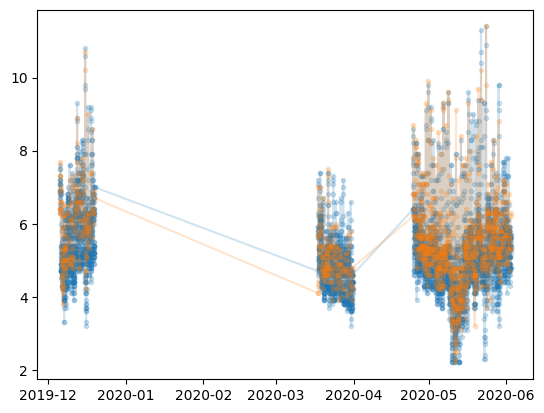

In [67]:
plt.plot(df_plot.loc[df_plot["Record Type"] == 0, "Historic Glucose mmol/L"], ".-", alpha=0.2)
plt.plot(df_plot.loc[df_plot["Record Type"] == 1, "Scan Glucose mmol/L"], ".-", alpha=0.2)
plt.show()

---

## Part 2 (week 2): Exploring Glucose Time-Series Data

Peak detection in glucose time-series data is crucial for recognizing spikes in blood glucose levels, offering insights into the body's responses to events like meals or stress. This analysis supports patients and healthcare providers to make informed decisions about blood glucose management. In this second part, we delve deeper into data exploration, leveraging smoothing and decomposition algorithms to uncover valuable patterns. The steps of the time-of-day analysis is mandatory, but you are free to choose additional explorations. A good approach is to create functions, it will be easier to re-run certain analysis and explore effect of chosen strategies. 

### Smoothing and Decomposition Algorithms
Utilizing smoothing algorithms becomes essential for peak detection, particularly when raw data exhibits fluctuations or short-term variations that might obscure significant patterns. Decomposition further enhances this process by isolating long-term trends from short-term fluctuations, aiding in the identification of peaks within the overall trend component.

### Analysis
- Determine when glucose levels typically reach their highest and lowest points during the day. Identify potential risks; points ≤50 mg/dL to emphasize occurrence of extreme hypoglycemia and points >300 mg/dL to emphasize occurrence of extreme hyperglycemia.
- Explore differences in glucose levels across various hours of the day. Investigate the duration between consecutive peaks to understand patterns in glucose level fluctuations
- Stratify the analysis based on weekdays and weekends to capture potential variations.
- Calculate meaningful statistics such as % time spent within target range of 70–180 mg/dL, below 70 mg/dL, and above 180 mg/dL (for more inspiration see [2])
- Calculate low glucose events. This is defined as when the sensor glucose reading is lower than 70 mg/dL for longer than 15 minutes
- Determine if there is a trend


### Documentation
- Document all decisions made during the explorations, providing transparency and aiding reproducibility. Reflect on the outcomes using captions when appropiate. Deliver your solution in a repository with a readme file. 

### Challenges 
In this study case there are several advanced topics you could consider to implement:
- An interactive Bokeh plot to dynamically examine the impact of different smoothing algorithms.
- An parser object (or set of objects) loading and preprocess the glucose data.


[2] Clarke W, Kovatchev B. Statistical tools to analyze continuous glucose monitor data. Diabetes Technol Ther. 2009 Jun;11 Suppl 1(Suppl 1):S45-54. doi: 10.1089/dia.2008.0138. PMID: 19469677; PMCID: PMC2903980.
